<a href="https://colab.research.google.com/github/akanniade1-1/python-youtube-code/blob/master/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

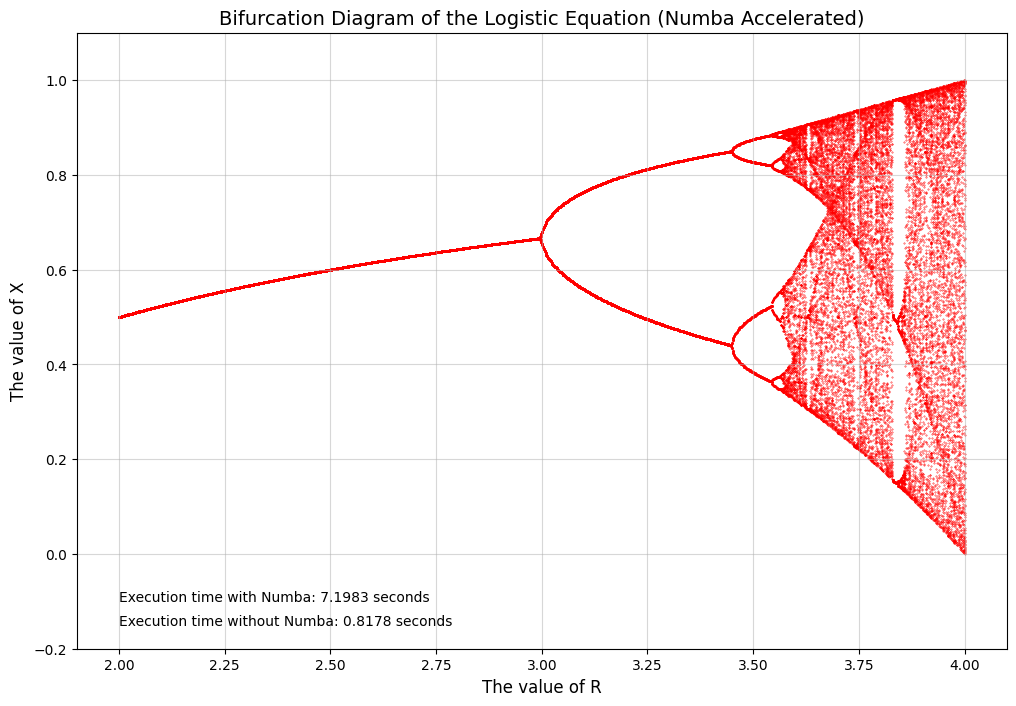

Execution time with Numba: 7.1983 seconds
Execution time without Numba: 0.8178 seconds


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit, prange
import time

# Logistic equation with Numba for acceleration and parallelization
@jit(nopython=True, parallel=True)
def logistic_bifurcation_numba(r_values, iterations, last, x_init):
    points = []
    for r in prange(len(r_values)):  # Parallelized loop over R values
        x = x_init
        for i in range(iterations):
            x = r_values[r] * x * (1 - x)
            if i >= iterations - last:  # Store only the last `last` iterations
                points.append((r_values[r], x))
    return np.array(points)

# Logistic equation without Numba
def logistic_bifurcation_no_numba(r_values, iterations, last, x_init):
    points = []
    for r in r_values:  # Regular loop over R values
        x = x_init
        for i in range(iterations):
            x = r * x * (1 - x)
            if i >= iterations - last:  # Store only the last `last` iterations
                points.append((r, x))
    return np.array(points)

# Parameters
r_values = np.linspace(2.0, 4.0, 1000)  # R values from 2.0 to 4.0
iterations = 500  # Total number of iterations
last = 100  # Keep the last 100 iterations
x_init = 0.3  # Initial condition

# Measure execution time with Numba
start_numba = time.time()
points_numba = logistic_bifurcation_numba(r_values, iterations, last, x_init)
end_numba = time.time()
numba_time = end_numba - start_numba

# Measure execution time without Numba
start_no_numba = time.time()
points_no_numba = logistic_bifurcation_no_numba(r_values, iterations, last, x_init)
end_no_numba = time.time()
no_numba_time = end_no_numba - start_no_numba

# Extract R and X values for plotting (using Numba results)
r_values_plot, x_values_plot = points_numba[:, 0], points_numba[:, 1]

# Plot the bifurcation diagram
plt.figure(figsize=(12, 8))
plt.scatter(r_values_plot, x_values_plot, s=0.1, color="red")
plt.title("Bifurcation Diagram of the Logistic Equation (Numba Accelerated)", fontsize=14)
plt.xlabel("The value of R", fontsize=12)
plt.ylabel("The value of X", fontsize=12)

# Add execution times to the plot
plt.text(2.0, -0.1, f"Execution time with Numba: {numba_time:.4f} seconds", fontsize=10, color="black")
plt.text(2.0, -0.15, f"Execution time without Numba: {no_numba_time:.4f} seconds", fontsize=10, color="black")

plt.ylim(-0.2, 1.1)  # Adjust the y-axis to fit annotations
plt.grid(alpha=0.5)
plt.show()

# Print execution times
print(f"Execution time with Numba: {numba_time:.4f} seconds")
print(f"Execution time without Numba: {no_numba_time:.4f} seconds")
